#                                   <hr>Out of School Rate Analysis

##### The out-of-school rate is defined as the proportion of children and young people in the official age range for the given level of education who are not enrolled in pre-primary, primary, secondary, or higher levels of education. 

##### The dataset was retrieved from the UNESCO’s Institute of Statistics developed database for inequality in education. They made the data available to the public. The data consists of 192 countries out of school rates from the year 2000 onwards to till 2022.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading Dataset 

df = pd.read_csv("C:\\Users\\supri\\OneDrive\\Desktop\\Data Science\\Data Analysis Projects\\OOS_Rate_Countries.csv")
print(df)

               name country level     sex  year  value  lower  upper
0             Aruba     ABW  prim  female  2000   0.07   0.04   0.12
1             Aruba     ABW  lsec  female  2000   0.12   0.08   0.19
2             Aruba     ABW  usec  female  2000   0.13   0.05   0.24
3       Afghanistan     AFG  prim  female  2000   0.61   0.48   0.72
4       Afghanistan     AFG  lsec  female  2000   0.85   0.66   0.95
...             ...     ...   ...     ...   ...    ...    ...    ...
50371         Samoa     WSM   all   total  2022   0.06   0.04   0.08
50372         Yemen     YEM   all   total  2022   0.24   0.16   0.33
50373  South Africa     ZAF   all   total  2022   0.12   0.08   0.16
50374        Zambia     ZMB   all   total  2022   0.21   0.16   0.28
50375      Zimbabwe     ZWE   all   total  2022   0.17   0.14   0.21

[50376 rows x 8 columns]


In [3]:
df.isnull().sum()

name       0
country    0
level      0
sex        0
year       0
value      0
lower      0
upper      0
dtype: int64

In [4]:
unique_values = {column: df[column].unique() for column in df.columns if column not in ['country', 'value',  'lower',  'upper']}

print(unique_values)

{'name': array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'U. A. Emirates', 'Argentina', 'Armenia', 'Antigua/Barbuda',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas', 'Bosnia/Herzeg.', 'Belarus', 'Belize', 'Bolivia',
       'Brazil', 'Barbados', 'Brunei Daruss.', 'Bhutan', 'Botswana',
       'C. A. R.', 'Canada', 'Switzerland', 'Chile', 'China',
       "Côte d'Ivoire", 'Cameroon', 'D. R. Congo', 'Congo', 'Colombia',
       'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Rep.', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Micronesia, F. S.', 'United Kingdom',
       'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Equat. Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana',
       'Hong Kong, China', 'Hon

### Data Manipulation

In [5]:
#Data Cleaning

df = df.rename(columns={"name": "Country Name", "country": "Country Code"})
df = df.replace({'prim' : 'Primary'},regex = True)
df = df.replace({'lsec' : 'Lower Secondary'}, regex = True)
df = df.replace({'usec' : 'Upper Secondary'}, regex = True)

### Exploratory Data Analysis

In [6]:
#Data Exploration

Prim_df = df[(df['level'] == 'Primary') & (df['year'] == 2022) & (df['sex'] == 'total')]
Prim_df = Prim_df.sort_values('value')

Lsec_df = df[(df['level'] == 'Lower Secondary') & (df['year'] == 2022) & (df['sex'] == 'total')]
Lsec_df = Lsec_df.sort_values('value')

Usec_df = df[(df['level'] == 'Upper Secondary') & (df['year'] == 2022) & (df['sex'] == 'total')]
Usec_df = Usec_df.sort_values('value')

<AxesSubplot:title={'center':'Upper Secondary level data projections 2022'}, xlabel='Country Name', ylabel='value'>

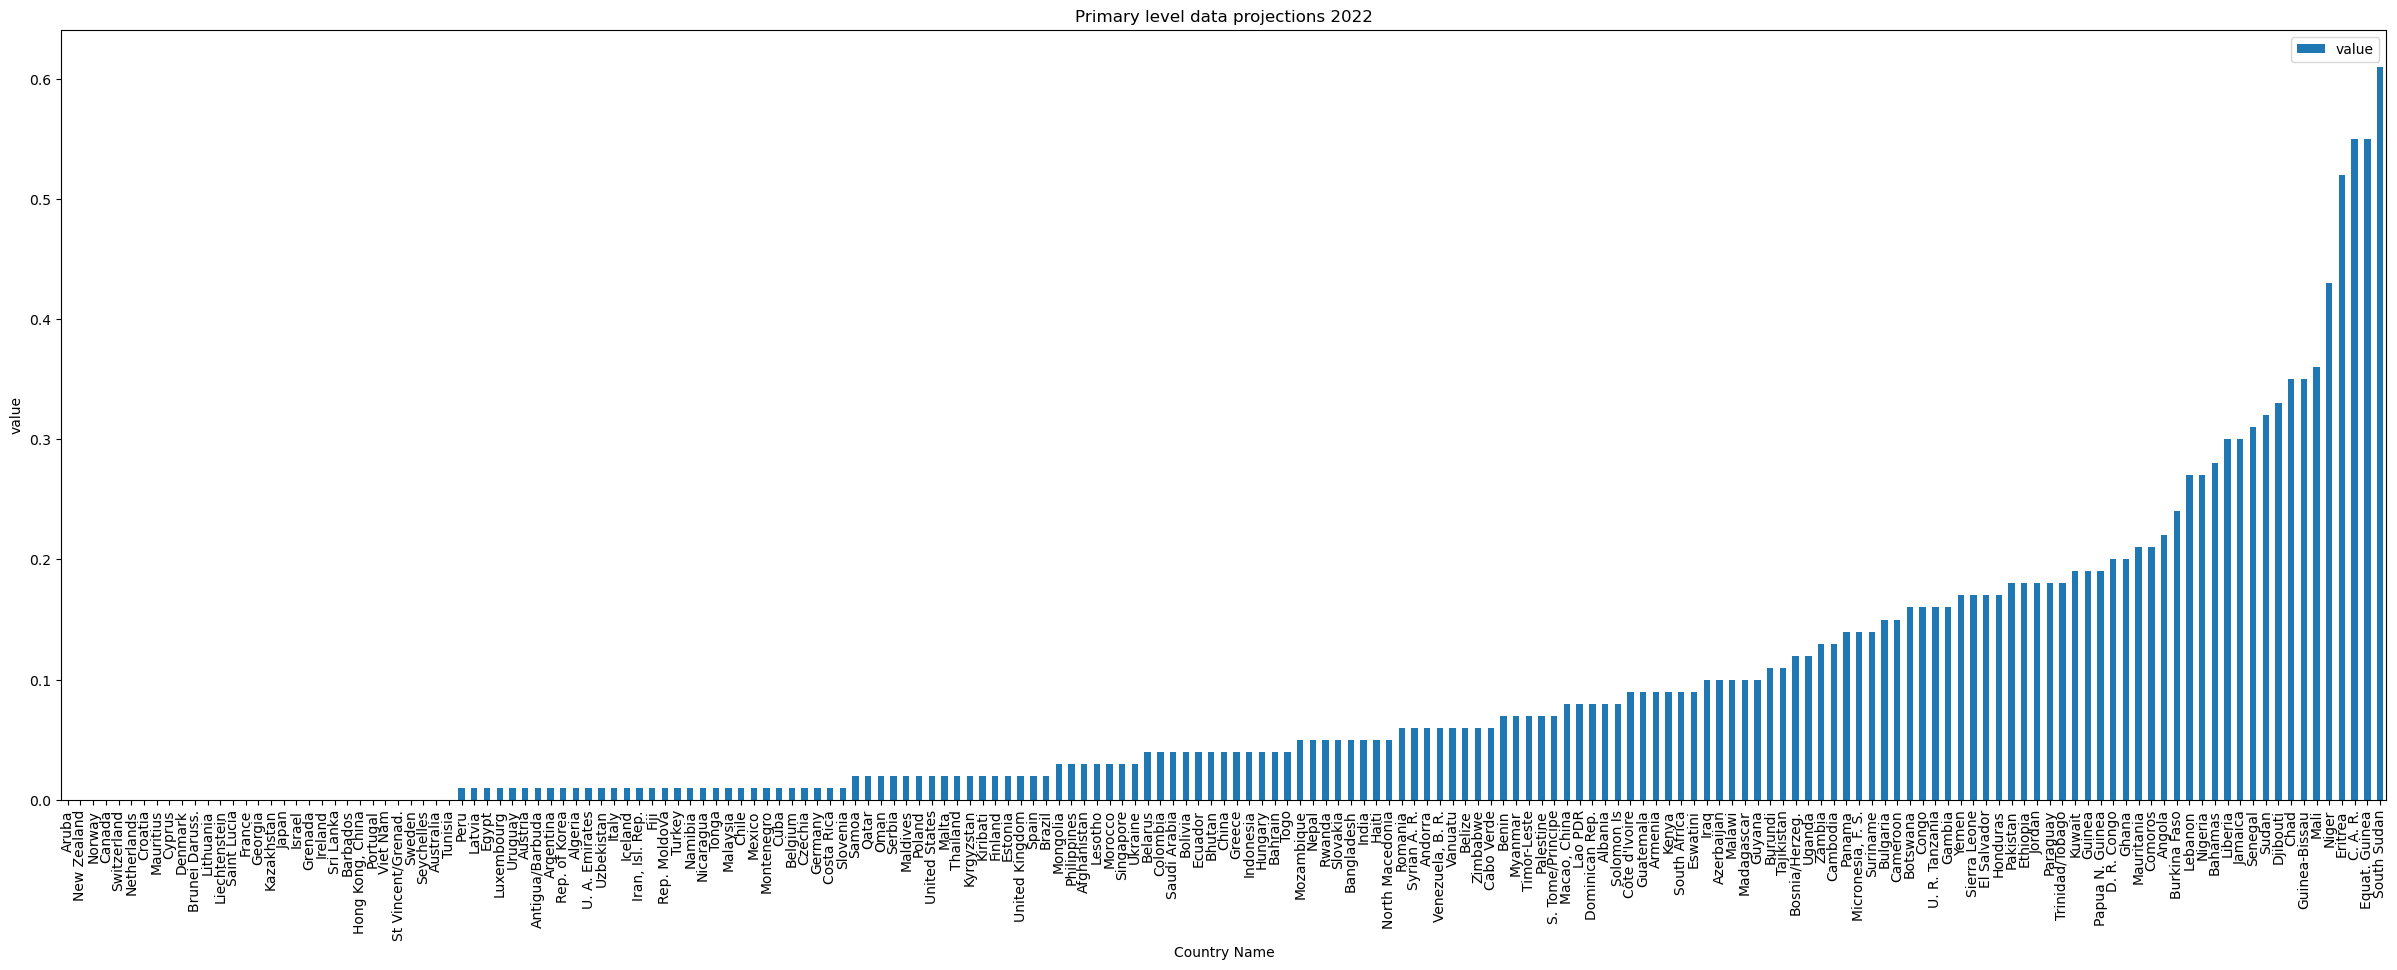

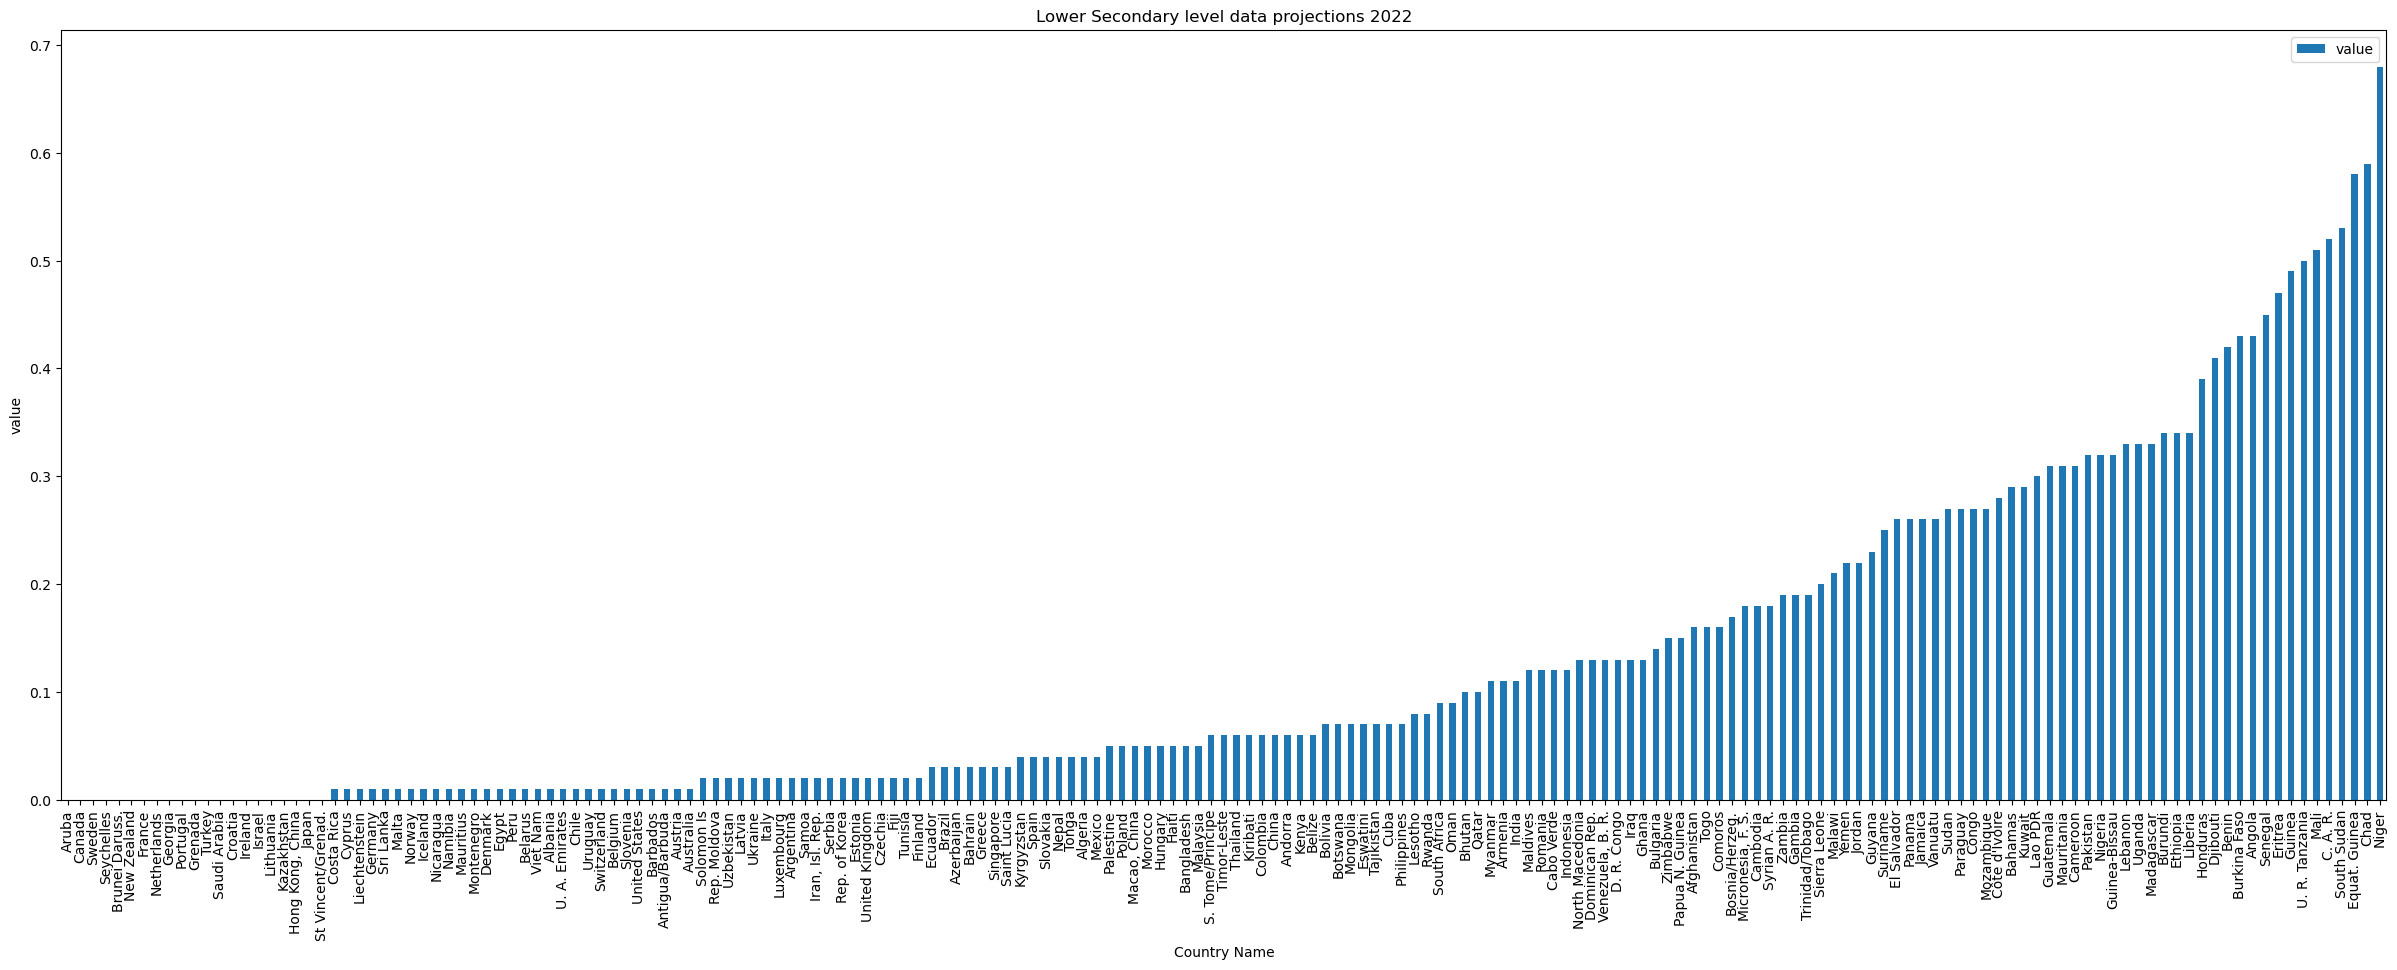

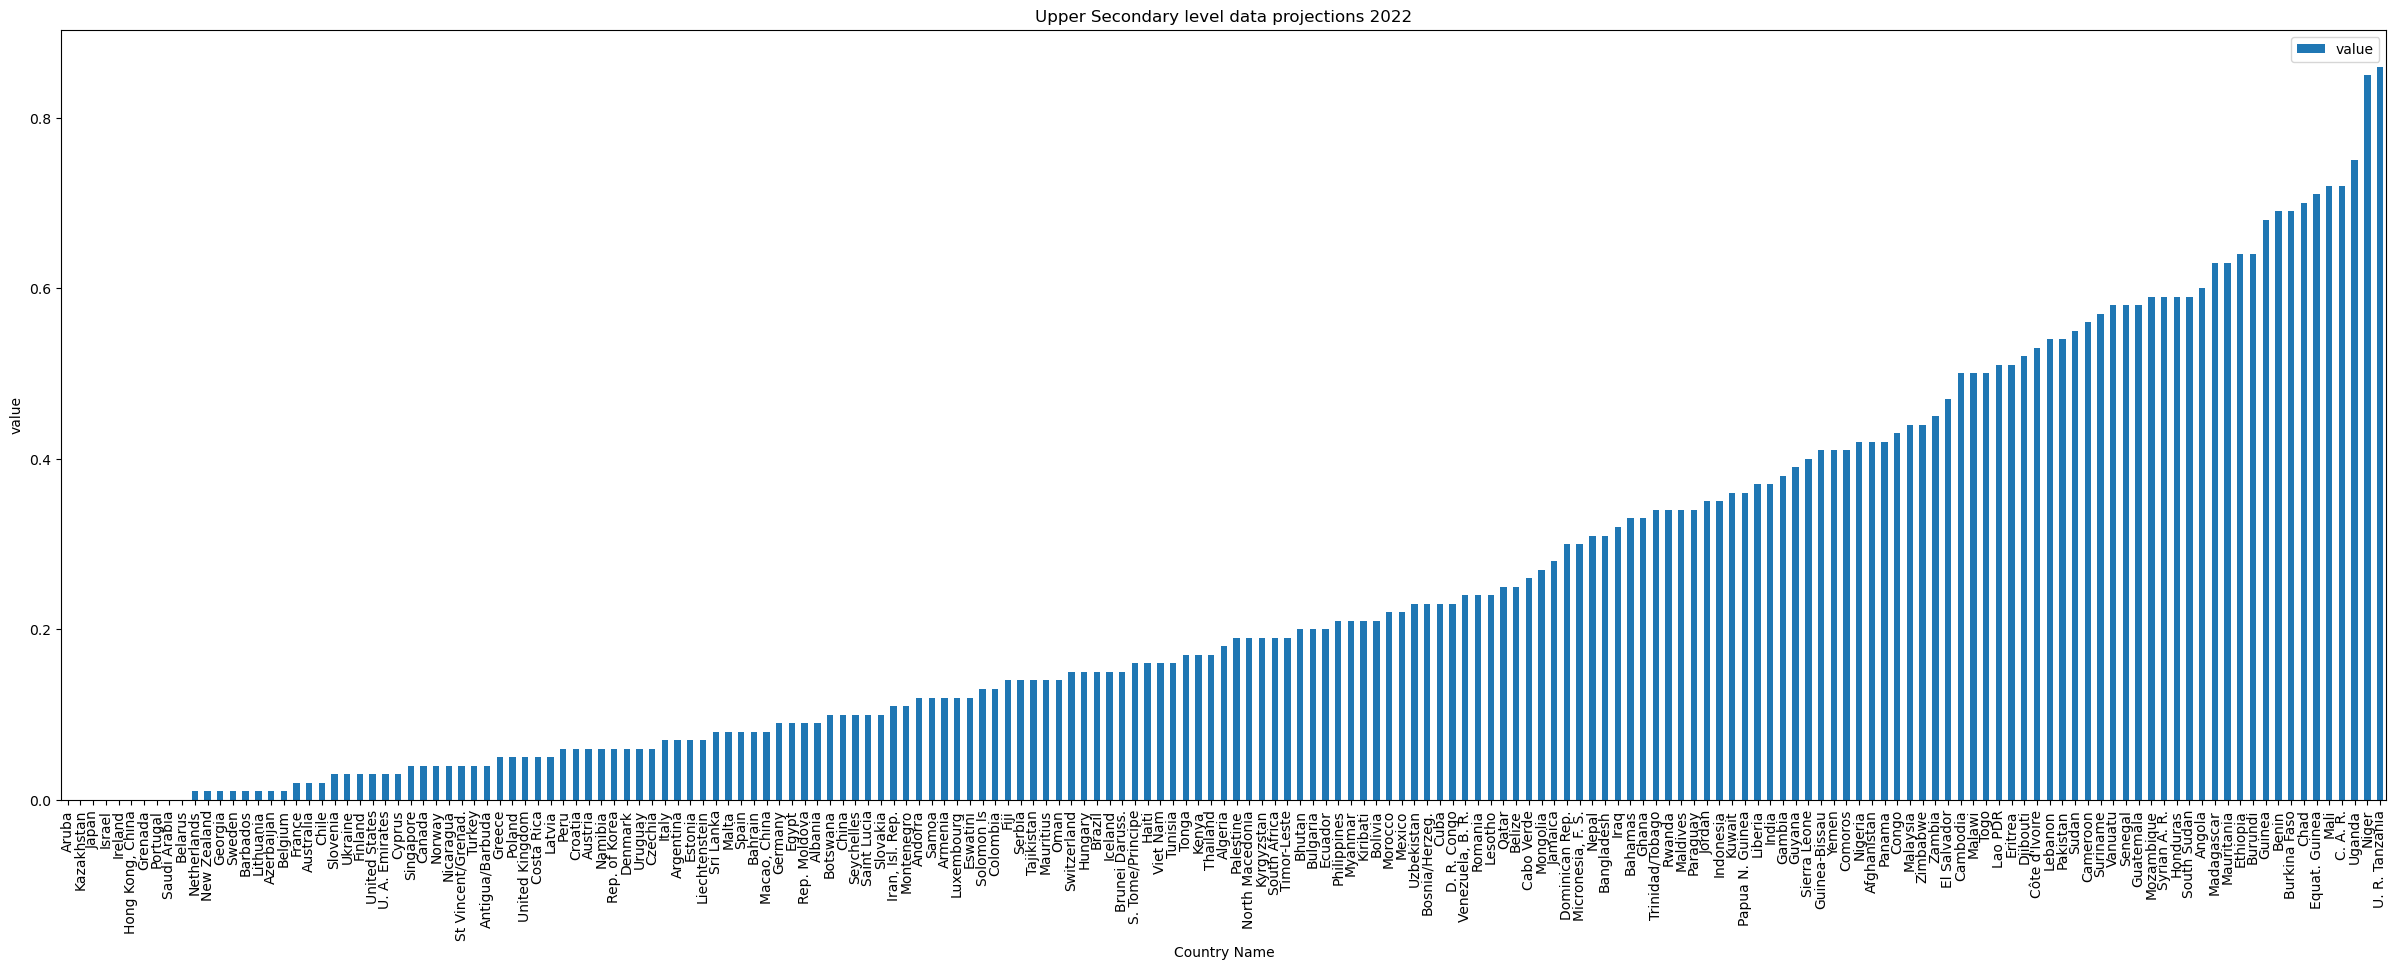

In [7]:
# Data Visualization

# Show Primary education level statistics in the year 2022
Prim_df.plot.bar(x = "Country Name", y = "value", title = "Primary level data projections 2022", xlabel = "Country Name", ylabel = "value", figsize = (30, 10))

# Show Lower Secondary education level statistics in the year 2022
Lsec_df.plot.bar(x = "Country Name", y = "value", title = "Lower Secondary level data projections 2022", xlabel = "Country Name", ylabel = "value", figsize = (30, 10))
 
# Show Upper Secondary education level statistics in the year 2022
Usec_df.plot.bar(x = "Country Name", y = "value", title = "Upper Secondary level data projections 2022", xlabel = "Country Name", ylabel = "value", figsize = (30, 10))

On Comparing the above three graphs, we can observe an increse in Out of school rate among children from primary to Upper Secondary level. It means more children are dropping out from school with increase in education level.

In [8]:
# Filter the DataFrame for all levels and total sex
filtered_df = df[(df['level'] != 'all') & (df['sex'] != 'total')]

# Group the data by sex and level and calculate the sum of values for each sex
sex_grouped = filtered_df.groupby(['sex','level'])['value'].sum()


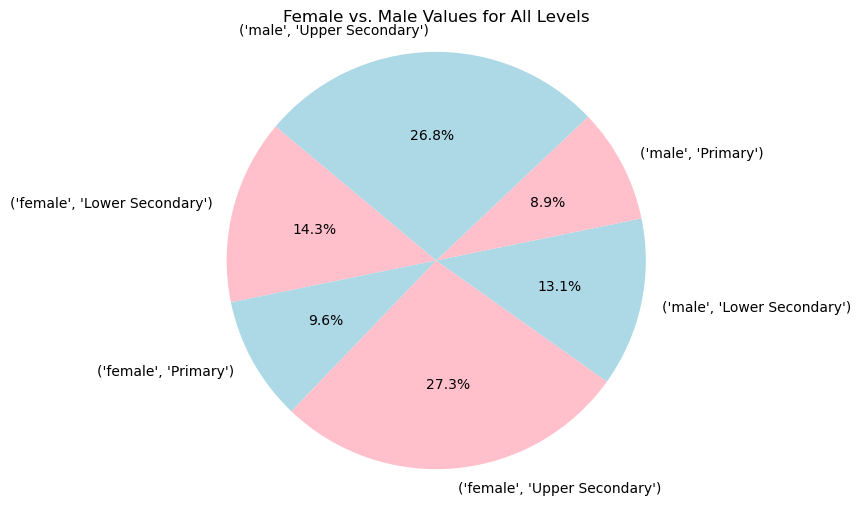

In [9]:
# pie chart for female and male values for 'primary','lower secondary', 'upeer secondary' levels
labels = sex_grouped.index
values = sex_grouped.values
colors = ['pink', 'lightblue']

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Female vs. Male Values for All Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The above Pie chart shows the gender bias in accessing education. We can observe the percentage of females out of school is more than that of males in each level of education.

In [10]:

# Filtering rows where 'level' is 'Primary' and 'year' is 2022 and 'sex' is 'total'
filtered_data = df[(df['level'] == "Primary") & (df['year'] == 2022) & (df['sex'] == "total")]

# Sort the filtered data by the 'value' column in ascending order
filtered_data = filtered_data.sort_values(by='value')

In [11]:
# Getting the last 10 countries
last_10_countries = filtered_data['Country Name'].unique()[-10:]

# Filtering the original dataset to keep only rows for the last 10 countries
df1 = df[(df['Country Name'].isin(last_10_countries)) & (df['level'] == "Primary") & (df['sex'] == "total")]


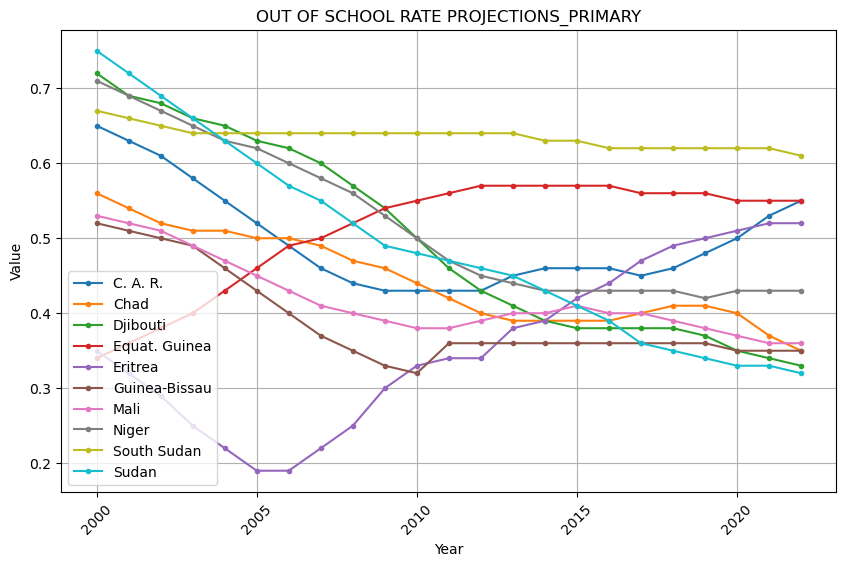

In [12]:
# line plot with points
fig, ax = plt.subplots(figsize=(10, 6))

for country, group in df1.groupby('Country Name'):
    ax.plot(group['year'], group['value'], label=country, marker='o', markersize=3)

ax.set_title('OUT OF SCHOOL RATE PROJECTIONS_PRIMARY')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.legend(loc='best')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


This graph explains the trends in out of school rate of the top 10 countries that exhibited high out of school rate in the year 2022. We can observe from the graph that 'Sudan' shows an improving enrollment of children in school while Equat.Guinea has an incresing trend showing high out of school rates over the period. Unfortunately, all the 10 countries are from African continent.

In [13]:
# Filtering the original dataset to keep only rows for the last 10 countries
df2 = df[(df['Country Name'].isin(last_10_countries)) & (df['level'] == "all") & (df['sex'] != "total") & (df['year'].isin([2000, 2022]))]
# Group by 'name', 'sex', and 'year' and calculate the summary statistic 'value'
df2 = df2.groupby(['Country Name', 'sex', 'year'])['value'].sum().reset_index()

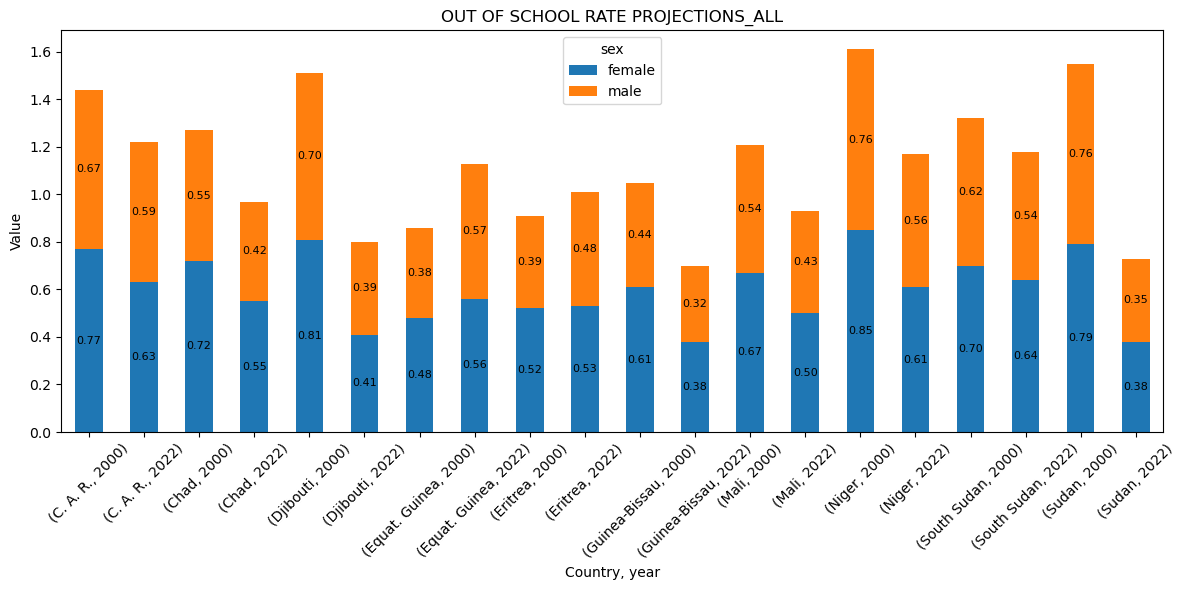

In [14]:
# bar plot faceted by 'sex'
fig, ax = plt.subplots(figsize=(12, 6))
df2.pivot_table(index=['Country Name', 'year'], columns='sex', values='value', aggfunc='first').plot(kind='bar', stacked=True, ax=ax)
plt.title('OUT OF SCHOOL RATE PROJECTIONS_ALL')
plt.xlabel('Country, year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='sex')
# Adding value annotations to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)
plt.tight_layout()
plt.show()

The above stacked bar plot shows the variation of Out of school rates between years '2000' and '2022' and also among males and females. 